In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap="gray"):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

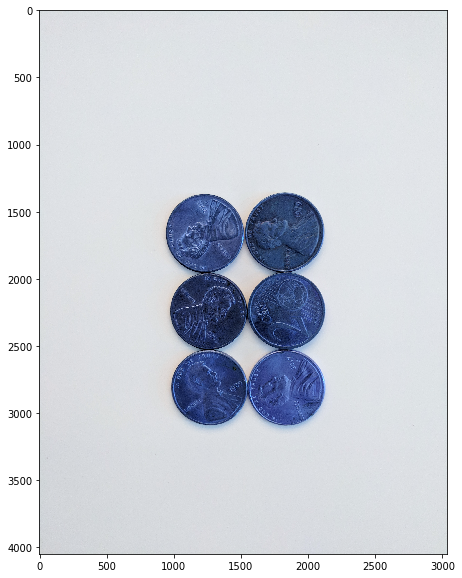

In [3]:
img=cv2.imread(r"C:\Users\Kuttan\Downloads\Python CVCourse\Python CV_Course\Computer-Vision-with-Python\DATA\pennies.jpg")
display(img)

In [4]:
img=cv2.medianBlur(img,35)

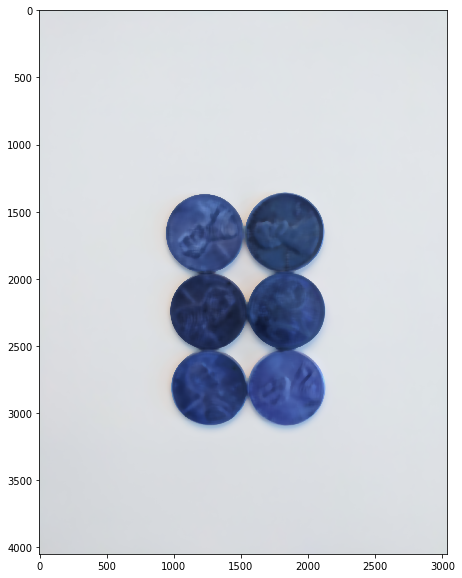

In [5]:
display(img)

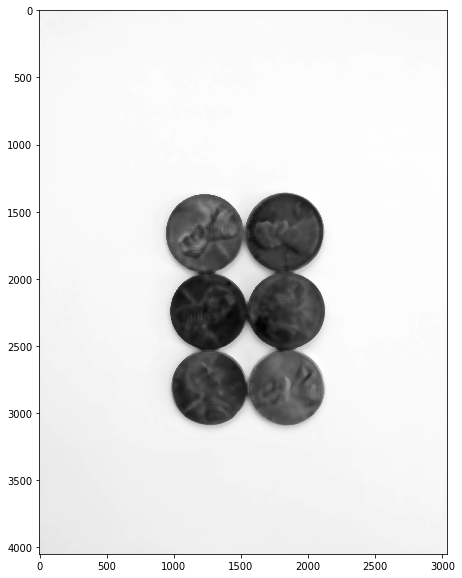

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

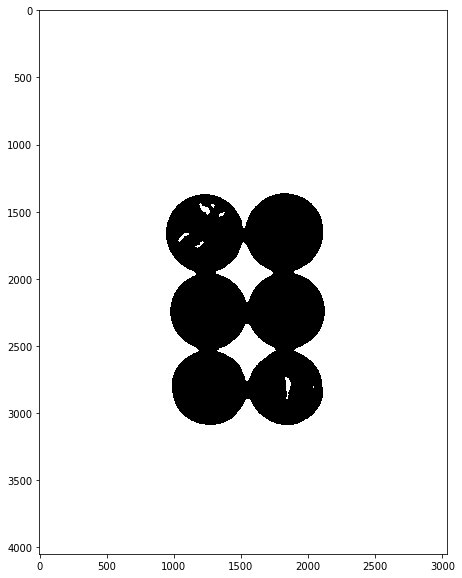

In [7]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
display(thresh)

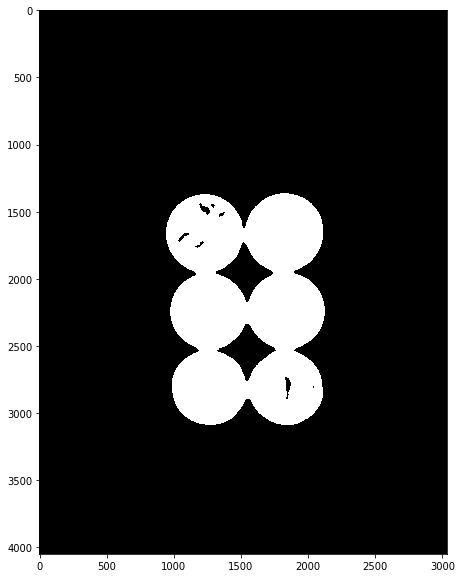

In [8]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
display(thresh)

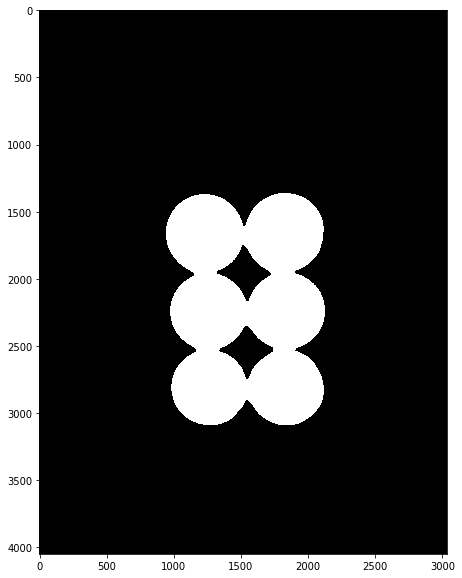

In [9]:
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

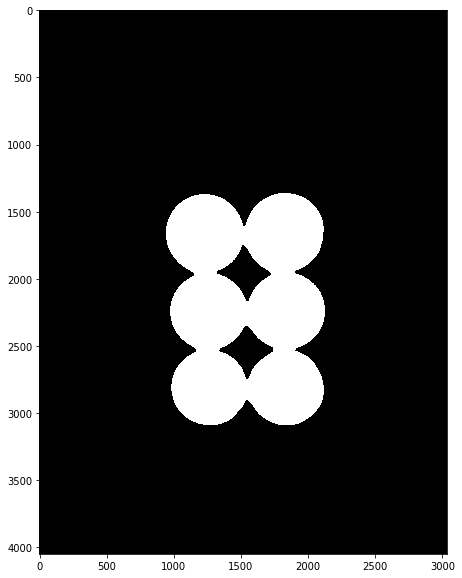

In [10]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

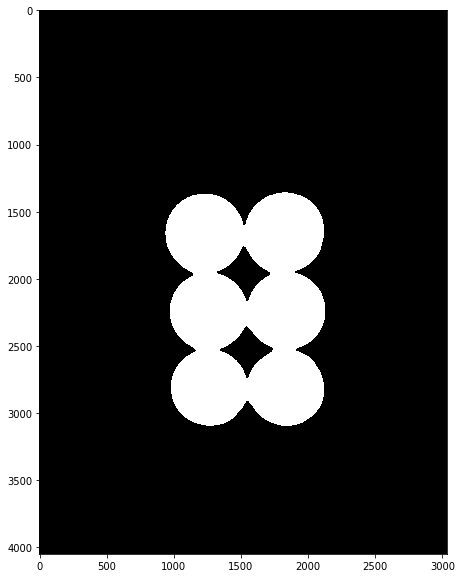

In [11]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

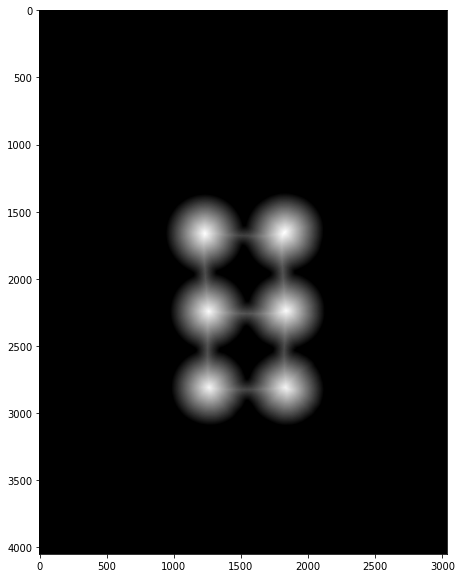

In [12]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

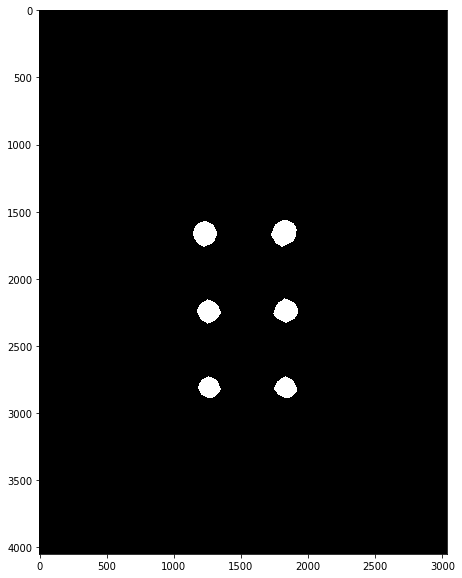

In [13]:
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

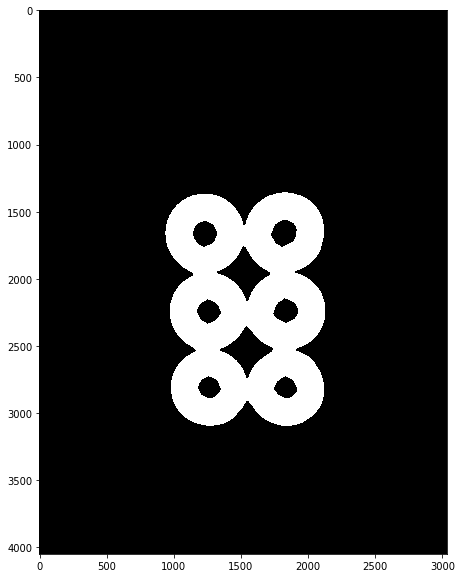

In [14]:
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
display(unknown)

In [15]:
ret,markers=cv2.connectedComponents(sure_fg)

In [16]:
markers=markers+1

In [17]:
markers[unknown==255]=0

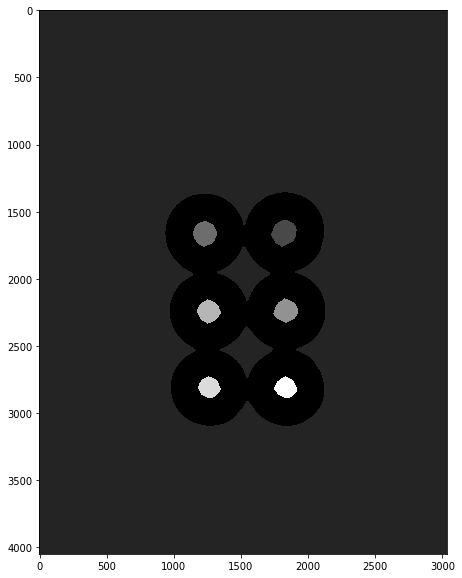

In [18]:
display(markers)

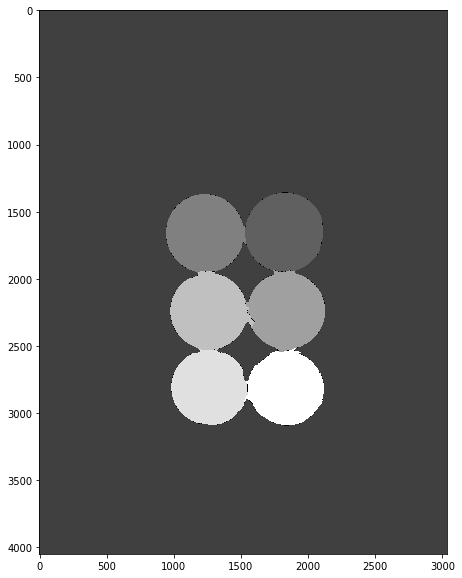

In [19]:
markers=cv2.watershed(img,markers)
display(markers)

In [20]:
image,contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [21]:
img=cv2.imread(r"C:\Users\Kuttan\Downloads\Python CVCourse\Python CV_Course\Computer-Vision-with-Python\DATA\pennies.jpg")

In [22]:
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

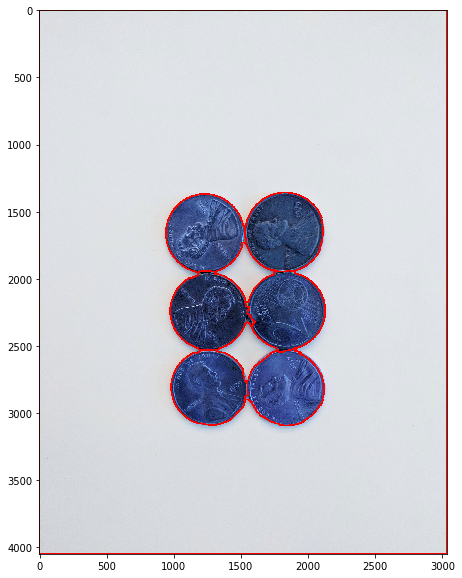

In [23]:
display(img)